<a href="https://colab.research.google.com/github/LudovicaCi/saliency-benchmark/blob/main/bar_chart_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

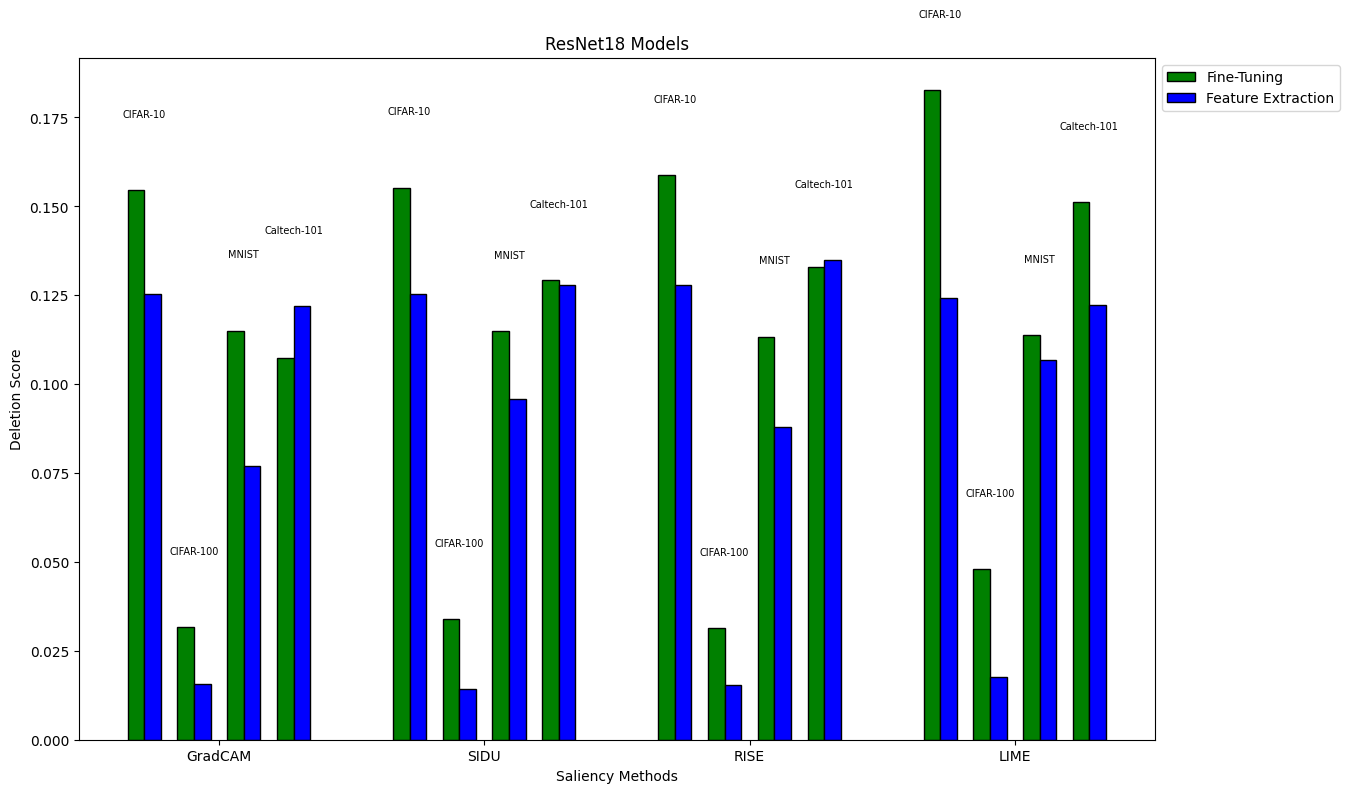

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dati aggiornati per VGG11
saliency_methods = ['GradCAM', 'SIDU', 'RISE', 'LIME']
datasets = ['CIFAR-10', 'CIFAR-100', 'MNIST', 'Caltech-101']

# Dati di "insertion" per ogni metodo di salienza e per ogni dataset
# [fintunata_cifar10, non_fintunata_cifar10, fintunata_cifar100, non_fintunata_cifar100, fintunata_mnist, non_fintunata_mnist, fintunata_caltech101, non_fintunata_caltech101]
ResNet18_insertion_values = {
    'GradCAM': [0.49168469421578803, 0.17973499682832003, 0.141975653818838, 0.026880153417193065, 0.11438869115427329, 0.08219119830199637, 0.415800215454364, 0.21213443254821007],
    'SIDU': [0.5008166122345713, 0.17657279777766374, 0.13438454986604026, 0.02458991119576192, 0.12689441811723265, 0.09171755519149827, 0.38267392655455235, 0.20527788185348075],
    'RISE': [0.25972258211071214, 0.15115126541644747, 0.06311316136545267, 0.020677082263977267, 0.11202192264503524, 0.09964910962544163, 0.2639116592427991, 0.1571521990133682],
    'LIME': [0.39478246476322226, 0.17657279777766374, 0.11708624033882718, 0.020677082263977267, 0.11644239812996414, 0.08119592415020273, 0.4310072123496484, 0.20554303870354548]
}

ResNet18_deletion_values = {
    'GradCAM': [0.1545283630683759, 0.1253554101990412, 0.0317097857407377, 0.015744380163973618, 0.11497705762010478, 0.07696222439172447, 0.107459809671759, 0.12188100072592738],
    'SIDU': [0.15530022794563578, 0.1253554101990412, 0.03381564080169144, 0.014175515071184424, 0.11496387837762989, 0.09568434514535179, 0.12931640674766592, 0.1278140711705878],
    'RISE': [0.1588251227604007, 0.12799041386988855, 0.031405831681165564, 0.0154598970769903, 0.11338987718075808, 0.08785528002264817, 0.132960250676809, 0.13491965732562375],
    'LIME': [0.18261149775841815, 0.12412829611504407, 0.04788026564514166, 0.01776547254184407, 0.11374659699327924, 0.10682427340736342, 0.1511567006297948, 0.12224450203644102]
}

VGG11_insertion_values = {
    'GradCAM': [0.3878395588143312, 0.3255501082922574, 0,0820523023486404, 0.08256670561549906, ,]
    'SIDU': [, , , ,],
    'RISE': [, , , ,],
    'LIME': [, , , ,]
}

VGG11_deletion_values = {
    'GradCAM': [0.13965878773101775, 0.12065038812999435, 0,033320806216705, 0.023417537204124667,],
    'SIDU': [, , , ,],
    'RISE': [, , , ,],
    'LIME': [, , , ,]
}


values = ResNet18_deletion_values

# Parametri per il grafico
bar_width = 0.2
spacing = 0.4  # Spazio tra le coppie di barre
method_spacing = (len(datasets) * 2 * bar_width + (len(datasets) - 1) * spacing)  # Distanza totale tra i gruppi di metodi
index = np.arange(len(saliency_methods)) * (method_spacing + spacing)

fig, ax = plt.subplots(figsize=(16, 8))

# Creazione delle barre per ogni metodo di salienza
for i, method in enumerate(saliency_methods):
    fintunata_values = values[method][0::2]  # valori per le reti fintunate
    non_fintunata_values = values[method][1::2]  # valori per le reti non fintunate

    for j, dataset in enumerate(datasets):
        pos_fintunata = index[i] + j * (bar_width + spacing)
        pos_non_fintunata = pos_fintunata + bar_width

        # Barre
        ax.bar(pos_fintunata, fintunata_values[j], bar_width, color='green', edgecolor='black', label='Fine-Tuning' if i == 0 and j == 0 else "")
        ax.bar(pos_non_fintunata, non_fintunata_values[j], bar_width, color='blue', edgecolor='black', label='Feature Extraction' if i == 0 and j == 0 else "")

        # Aggiungi il nome del dataset sopra le coppie di barre
        mid_point = (pos_fintunata + pos_non_fintunata) / 2
        max_height = max(fintunata_values[j], non_fintunata_values[j])
        ax.text(mid_point, max_height + 0.02, dataset, ha='center', va='bottom', fontsize=7, rotation=0)

# Impostazioni dell'asse
ax.set_xlabel('Saliency Methods')
ax.set_ylabel('Deletion Score')
ax.set_title('ResNet18 Models')

# Imposta le etichette al centro dei gruppi di barre
xticks_positions = index + method_spacing / 2.8
ax.set_xticks(xticks_positions)
ax.set_xticklabels(saliency_methods)

# Aggiungi la legenda
handles, labels = ax.get_legend_handles_labels()
# Rimuovi duplicati e ordina
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))

# Aggiusta i margini per visualizzare la legenda
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
